In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [52]:
gold_dataset = pd.read_csv('/content/gld_price_data.csv')

In [53]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [54]:
gold_dataset.shape

(2290, 6)

In [55]:
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [56]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [57]:
correlation = gold_dataset.drop("Date", axis= 1).corr()

<Axes: >

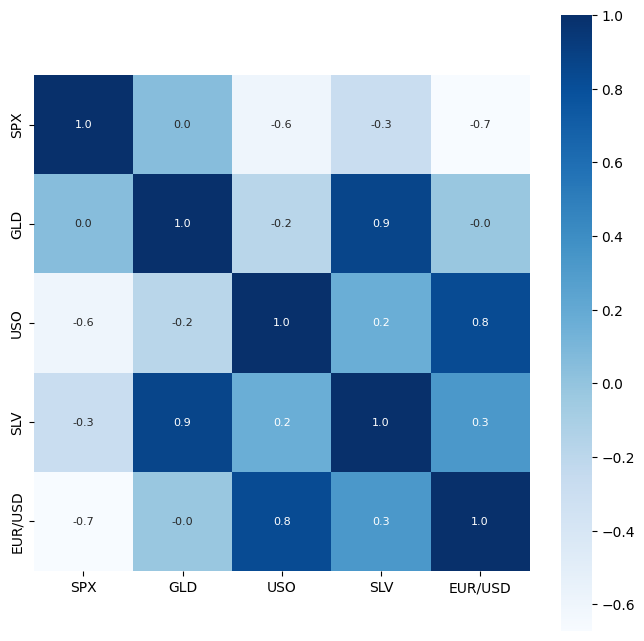

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [59]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-60-2941171426.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'], color='g')


<Axes: xlabel='GLD', ylabel='Density'>

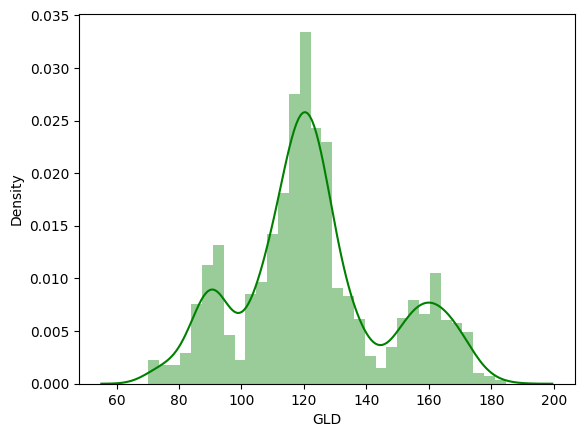

In [60]:
sns.distplot(gold_dataset['GLD'], color='g')

In [61]:
x = gold_dataset.drop(['GLD', 'Date'], axis=1)
y = gold_dataset['GLD']

In [62]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [66]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)

In [67]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [78]:
test_data_prediction = model.predict(x_test)
print(metrics.r2_score(test_data_prediction, y_test))

0.9898576338803861


In [79]:
error_score = metrics.mean_absolute_error(test_data_prediction, y_test)
print(error_score)

1.310061191681224


In [80]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print(error_score)

0.9899215525071214


In [82]:
y_test = list(y_test)

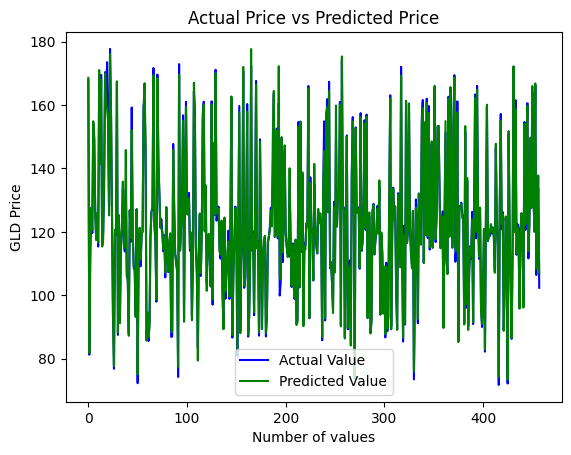

In [83]:
plt.plot(y_test,color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()